# Loading the Data

In [1]:
import pandas as pd

In [2]:
tweets = pd.read_csv("congress-tweets.csv", encoding='utf-8')
print(tweets.shape)
tweets.head()

(885832, 6)


,tweet,author,party,chamber,congress,retweet
0,VIDEO: Today's press conference w/ @SenBobCork...,"Alexander, Lamar (TN)",D,H,112,0
1,Will hold press conference in the Capitol's Ra...,"Alexander, Lamar (TN)",D,H,112,0
2,"""Major threats to our research universities"" O...","Alexander, Lamar (TN)",D,H,112,1
3,".@SenAlexander The Wind #PTC is ""a brazen flee...","Alexander, Lamar (TN)",D,H,112,1
4,VIDEO: Sen. Alexander on passing of Sen. @Dani...,"Alexander, Lamar (TN)",D,H,112,0


# Towards Data Science Pipeline

In [3]:
import pandas as pd
import numpy as np
import re
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Gensim
import gensim
from gensim.utils import simple_preprocess
# NLTK
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import Counter
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maryamshahid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_hdf("sampled_df.h5", index_col=0)
print(len(df))

198521


In [105]:
# pre processing function of the tweets
# just combined it all into one function so it is less messy

def pre_process_df(df):
    df['tidy_tweet'] = df['tweet'].str.lower()
    # REMOVE '@USER'
    df['tidy_tweet'] = np.vectorize(remove_users)(df['tweet'],"@ [\w]*", "@[\w]*")
    print('Users Removed from Tweets')
    # REMOVE HASHTAGS
    df['tidy_tweet'] = np.vectorize(remove_hashtags)(df['tidy_tweet'], "# [\w]*", "#[\w]*")
    print('Hashtags Removed from Tweets')
    # REMOVE LINKS
    df['tidy_tweet'] = np.vectorize(remove_links)(df['tidy_tweet'])
    print('Links Removed from Tweets')
    # EXTRACT TWEET DATE
    df['date'] = df['tweet'].str.extract(r"([A-Z][a-z]+\s\d+,\s\d+)\s*$")
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    print('Dates Extracted')
    # REMOVE Punctuations, Numbers, and Special Characters
    df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
    print('Punctuation, Numbers, and Special Characters Removed from Tweets')
    # TOKENIZATION
    df['tidy_tweet_tokens'] = list(tokenize(df['tidy_tweet']))
    print('Tokenized')
    # REMOVE STOPWORDS
    df['tokens_no_stop'] = remove_stopwords(df['tidy_tweet_tokens'])
    print('Stop Words Removed from Tweets')
    # DROP EMPTY TWEETS
    df = df[df['tokens_no_stop'].apply(lambda x: len(x)) > 0]
    print('Empty Tweets Dropped')
    print('DataFrame Finished')
    return df
    
def remove_users(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
  
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

def remove_hashtags(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

def tokenize(tweet):
    for word in tweet:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))
        
def remove_stopwords(tweets):
    # Prepare Stop Words
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'https', 'twitter', 'religions', 'pic','twitt','today','will','thank', 'thanks',
                      'jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec', 'great', 'new', 'day', 'rt',
                      'th', 'morning', 'week', 'com', 'net'])
    #words to remove from stopwords
    remove_words = ['we','our','ours','ourselves', 'i', 'me', 'my', "we'll", 'they', 'them', 'theirs']
    stop_words = [e for e in stop_words if e not in remove_words]
    return [[word for word in simple_preprocess(str(tweet)) if word not in stop_words] for tweet in tweets]

In [106]:
df = pre_process_df(df)

Users Removed from Tweets
Hashtags Removed from Tweets
Links Removed from Tweets
Dates Extracted


/var/folders/ps/bmjf5lcs4wb9h4b8k2jyb40c0000gn/T/ipykernel_56932/1542762211.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


Punctuation, Numbers, and Special Characters Removed from Tweets
Tokenized
Stop Words Removed from Tweets
Empty Tweets Dropped
DataFrame Finished


In [107]:
print(df.shape)
df.head()

(198521, 10)


,tweet,author,party,chamber,congress,retweet,tidy_tweet,date,tidy_tweet_tokens,tokens_no_stop
612145,We must fight for the victims and end #Humantr...,"Fincher, Stephen (TN-8)",R,H,113,0,We must fight for the victims and end Apr ...,2014-04-30,"[we, must, fight, for, the, victims, and, end,...","[we, must, fight, victims, end]"
616780,We need a select committee on Benghazi to fulf...,"Fleishmann, Charles (TN-3)",R,H,113,0,We need a select committee on Benghazi to fulf...,2013-09-11,"[we, need, select, committee, on, benghazi, to...","[we, need, select, committee, benghazi, fulfil..."
854334,My statement w/ @SenJohnMcCain on the permanen...,"Flake, Jeff (AZ)",R,S,113,0,My statement w on the permanent removal of t...,2014-11-24,"[my, statement, on, the, permanent, removal, o...","[my, statement, permanent, removal, former, di..."
201165,Good morning Las Cruces! Glad to be visiting w...,"Perry, Scott (PA-4)",D,H,113,0,Good morning Las Cruces Glad to be visiting w...,2013-08-22,"[good, morning, las, cruces, glad, to, be, vis...","[good, las, cruces, glad, visiting, our, frien..."
677798,Thanks to everyone who came out for the Defian...,"LoBiondo, Frank (NJ-2)",R,H,113,0,Thanks to everyone who came out for the Defian...,2013-05-10,"[thanks, to, everyone, who, came, out, for, th...","[everyone, came, defiance, courthouse, confere..."


In [108]:
dems = df[df['party'] == 'D']
reps = df[df['party'] == 'R']

In [109]:
tokens = np.concatenate(df['tokens_no_stop'].values)
dem_tokens = np.concatenate(dems['tokens_no_stop'].values)
rep_tokens = np.concatenate(reps['tokens_no_stop'].values)

In [110]:
words_for_cloud = " ".join(tokens)+" "
words_for_cloud_dem = " ".join(dem_tokens)+" "
words_for_cloud_rep = " ".join(rep_tokens)+" "

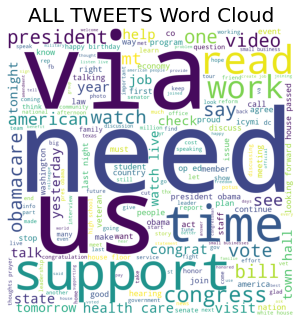

In [111]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(words_for_cloud)
 
# plot the WordCloud image                      
plt.figure(figsize = (4,4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('ALL TWEETS Word Cloud', fontsize=20)
 
plt.show()

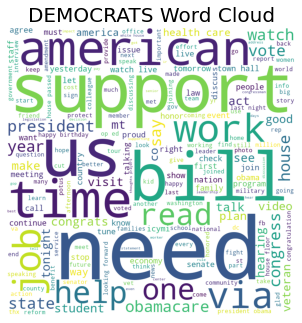

In [112]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(words_for_cloud_dem)
 
# plot the WordCloud image                      
plt.figure(figsize = (4,4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('DEMOCRATS Word Cloud', fontsize=20)
 
plt.show()

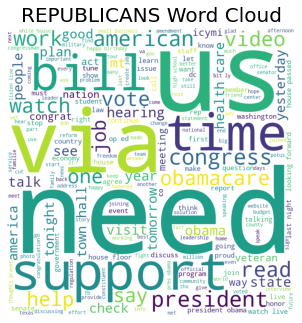

In [113]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(words_for_cloud_rep)
 
# plot the WordCloud image                      
plt.figure(figsize = (4,4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('REPUBLICANS Word Cloud', fontsize=20)
 
plt.show()

In [114]:
#filters the value_counts to quartile (here top 0.5% of words)
value_counts = pd.Series(list(tokens)).value_counts()
value_counts = value_counts[value_counts > 1]
value_counts = value_counts[value_counts > value_counts.quantile(0.995)]

<AxesSubplot:title={'center':'ALL Value Counts'}>

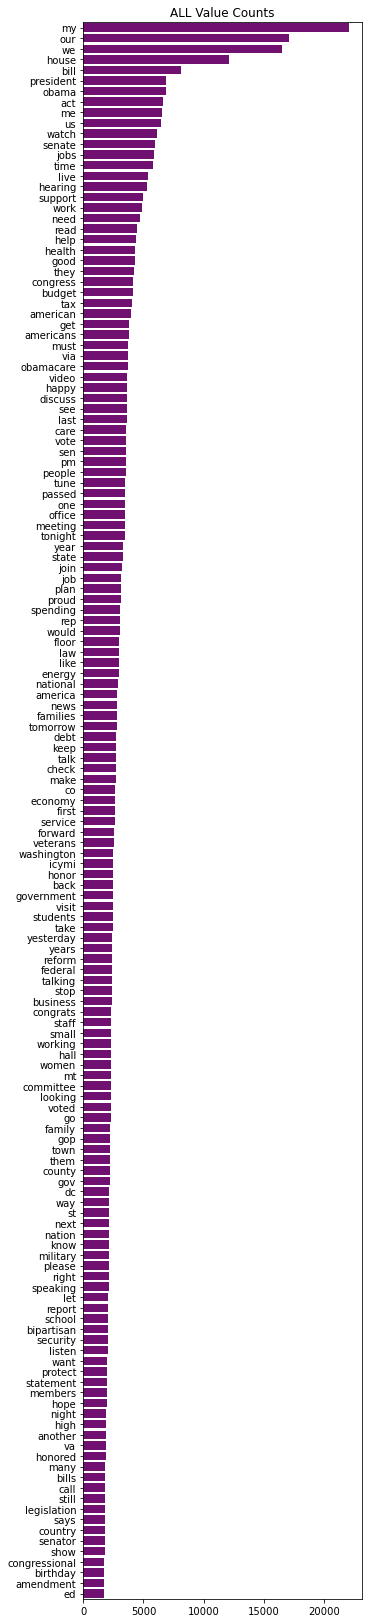

In [115]:
plt.figure(figsize = (5, len(value_counts)//5), facecolor = None)
plt.title('ALL Value Counts')
sns.barplot(x=value_counts.values, y=value_counts.index, color='purple')

In [116]:
#filters the value_counts to quartile (here top 0.5% of words)
value_counts = pd.Series(list(dem_tokens)).value_counts()
value_counts = value_counts[value_counts > 1]
value_counts = value_counts[value_counts > value_counts.quantile(0.995)]

<AxesSubplot:title={'center':'DEM Value Counts'}>

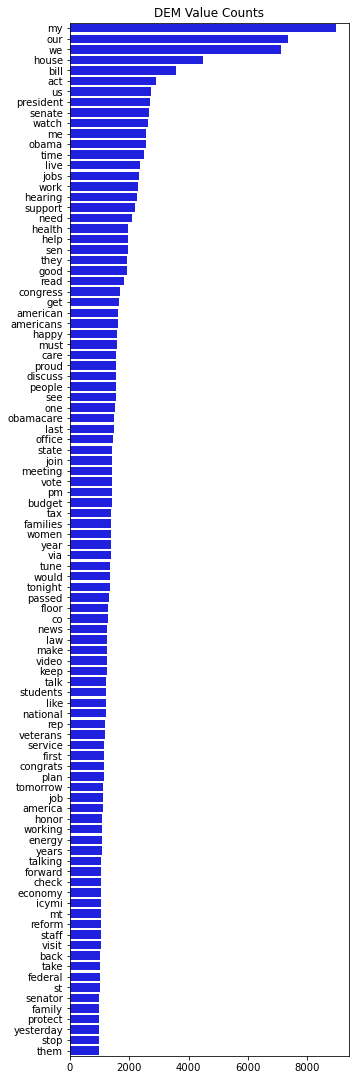

In [117]:
plt.figure(figsize = (5, len(value_counts)//5), facecolor = None)
plt.title('DEM Value Counts')
sns.barplot(x=value_counts.values, y=value_counts.index, color='blue')

In [118]:
#filters the value_counts to quartile (here top 0.5% of words)
value_counts = pd.Series(list(rep_tokens)).value_counts()
value_counts = value_counts[value_counts > 1]
value_counts = value_counts[value_counts > value_counts.quantile(0.995)]

<AxesSubplot:title={'center':'REP Value Counts'}>

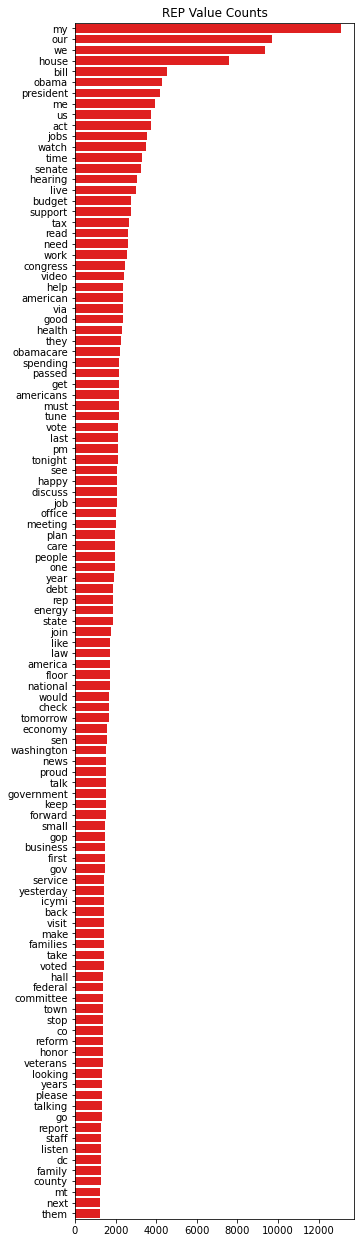

In [119]:
plt.figure(figsize = (5, len(value_counts)//5), facecolor = None)
plt.title('REP Value Counts')
sns.barplot(x=value_counts.values, y=value_counts.index, color='red')

## Religious Stuffs

In [120]:
# corpus of religious words Preston made through various webpages

religious_words = pd.read_csv('religious_words.csv', squeeze=True)

/var/folders/ps/bmjf5lcs4wb9h4b8k2jyb40c0000gn/T/ipykernel_56932/2578947138.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  religious_words = pd.read_csv('religious_words.csv', squeeze=True)


In [121]:
# create set of religious words and the list of tokens
# compare between sets, find overlapping words
# if there are no overlapping terms (i.e. the tokens contain no religious terms) then the boolean will evaluate to False
# if there ARE religious terms, the boolena will evalute to True

cont_rel_words_mask = df['tokens_no_stop'].apply(lambda x: len(set(religious_words) & set(x)) != 0)
df_religious = df[cont_rel_words_mask]

In [122]:
df_religious

,tweet,author,party,chamber,congress,retweet,tidy_tweet,date,tidy_tweet_tokens,tokens_no_stop
772107,My thoughts and prayers are with the people of...,"Walberg, Tim (MI-7)",R,H,113,0,My thoughts and prayers are with the people of...,2014-04-03,"[my, thoughts, and, prayers, are, with, the, p...","[my, thoughts, prayers, people, fort, hood, to..."
479800,My thoughts & prayers are with everyone involv...,"McKeon, Howard P. “Buck” (CA-25)",R,H,112,0,My thoughts prayers are with everyone involv...,2012-12-14,"[my, thoughts, prayers, are, with, everyone, i...","[my, thoughts, prayers, everyone, involved, ho..."
105350,Great meeting with SC Firefighters @beltonf1 T...,"Duncan, Jimmy (TN-2)",D,H,113,0,Great meeting with SC Firefighters Thank You ...,2013-05-08,"[great, meeting, with, sc, firefighters, thank...","[meeting, sc, firefighters, god, bless, firefi..."
817029,Thank God he wasn't there 4 Bosnia & Kosovo - ...,"McCain, John (AZ)",R,S,112,0,Thank God he wasn t there Bosnia Kosovo ...,2012-05-22,"[thank, god, he, wasn, there, bosnia, kosovo, ...","[god, bosnia, kosovo, secgen, rasmussen, inten..."
730479,"We condemn these cowardly attacks, send our pr...","Roskam, Peter (IL-6)",R,H,113,0,We condemn these cowardly attacks send our pr...,2014-10-22,"[we, condemn, these, cowardly, attacks, send, ...","[we, condemn, cowardly, attacks, send, our, pr..."
...,...,...,...,...,...,...,...,...,...,...
252395,"Matthew 1:21 She will bear a son, and you shal...","Shuster, Bill (PA-9)",D,H,113,0,Matthew She will bear a son and you shal...,2015-01-01,"[matthew, she, will, bear, son, and, you, shal...","[matthew, bear, son, shall, call, name, jesus,..."
765909,Participated in the National Day of #Prayer Ga...,"Thornberry, Mac (TX-13)",R,H,113,0,Participated in the National Day of Gathering...,2014-05-01,"[participated, in, the, national, day, of, gat...","[participated, national, gathering, one, voice..."
416444,My prayers go out to the family of Ret. Colone...,"Forbes, Randy (VA-04)",R,H,112,0,My prayers go out to the family of Ret Colone...,2012-12-11,"[my, prayers, go, out, to, the, family, of, re...","[my, prayers, go, family, ret, colonel, ralph,..."
104903,Breaking: @washingtonpost Egypt's interim Pres...,"Duncan, Jimmy (TN-2)",D,H,113,0,Breaking Egypt s interim President names new...,2013-07-09,"[breaking, egypt, interim, president, names, n...","[breaking, egypt, interim, president, names, p..."


FINDING: Dems and Reps seem to use religious language the same amount

In [123]:
df_religious.groupby('party')['tweet'].count() / df.groupby('party')['tweet'].count()

party
D    0.016525
R    0.017422
Name: tweet, dtype: float64

## Do Democrats actually swear more often than Republicans?

In [124]:
swear_words = pd.read_csv('bad-words.csv', squeeze=True)

/var/folders/ps/bmjf5lcs4wb9h4b8k2jyb40c0000gn/T/ipykernel_56932/427763497.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  swear_words = pd.read_csv('bad-words.csv', squeeze=True)


In [125]:
swear_words_mask = df['tokens_no_stop'].apply(lambda x: len(set(swear_words) & set(x)) != 0)
df_swear_words = df[swear_words_mask]

In [126]:
df_swear_words.groupby('party')['tweet'].count() / df.groupby('party')['tweet'].count()

party
D    0.109991
R    0.108183
Name: tweet, dtype: float64

## Word Difficulty


## Inclusive vs Exclusive Language

In [147]:
inclusive = ['we', 'our', 'ours']
exclusive = ['my', 'i', 'mine', 'me', 'them', 'theirs', 'they']

mask = df['tokens_no_stop'].apply(lambda x: len(set(exclusive) & set(x)) != 0)
df_exclusive = df[mask]

mask2 = df['tokens_no_stop'].apply(lambda x: len(set(inclusive) & set(x)) != 0)
df_inclusive = df[mask2]

In [148]:
inc = df_inclusive.groupby('party')['tweet'].count() / df.groupby('party')['tweet'].count()
inc.name = 'inclusive'

In [149]:
ex = df_exclusive.groupby('party')['tweet'].count() / df.groupby('party')['tweet'].count()
ex.name = 'exclusive'

In [150]:
combined = pd.merge(inc, ex, on='party')
combined

,inclusive,exclusive
party,,
D,0.142744,0.155128
R,0.138300,0.162857


<AxesSubplot:xlabel='party'>

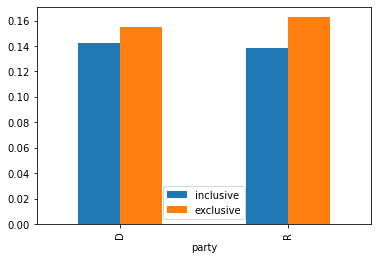

In [172]:
# Visualizing

combined.plot(kind='bar')

In [171]:
total = 0
for word in exclusive:
    total += reps.tweet.str.count(word).sum()
rep_exc = total / reps.tweet.str.count("\\w+").sum()


total = 0
for word in exclusive:
    total += dems.tweet.str.count(word).sum()
dem_exc = total / reps.tweet.str.count("\\w+").sum()

total = 0
for word in inclusive:
    total += reps.tweet.str.count(word).sum()
rep_inc = total / reps.tweet.str.count("\\w+").sum()


total = 0
for word in inclusive:
    total += dems.tweet.str.count(word).sum()
dem_inc = total / reps.tweet.str.count("\\w+").sum()

print("Proportion of exclusive words in republican tweets: ", rep_exc)
print("Proportion of exclusive words in democrat tweets: ", dem_exc)
print("Proportion of inclusive words in republican tweets: ", rep_inc)
print("Proportion of inclusive words in democrat tweets: ", dem_inc)

Proportion of exclusive words in republican tweets:  0.27214820682702
Proportion of exclusive words in democrat tweets:  0.20254692976139038
Proportion of inclusive words in republican tweets:  0.01617856514154944
Proportion of inclusive words in democrat tweets:  0.011996495271016372
